In [1]:
import pandas as pd, numpy as np

In [2]:
#df = pd.read_csv('/home/just/Desktop/vovan/Аэрофлот_1day_01012008_15052016.txt',sep=';')#,error_bad_lines=False)
#df = pd.read_csv('/home/just/Desktop/vovan/Сургнфгз_1day_01012008_15052016.txt',sep=';')#,error_bad_lines=False)
df = pd.read_csv('data/Роснефть_1day_01012008_15052016.txt',sep=';')#,error_bad_lines=False)

In [3]:
renamer = {c:c.strip('<>') for c in df.columns}
df.rename(columns=renamer,inplace=True)

In [4]:
df.dtypes

TICKER      object
PER         object
DATE         int64
TIME         int64
OPEN       float64
HIGH       float64
LOW        float64
CLOSE      float64
VOL          int64
OPENINT      int64
dtype: object

In [5]:
df.head(15)

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT
0,Роснефть,D,20080109,0,231.70,236.10,227.02,227.74,7560861,0
1,Роснефть,D,20080110,0,229.94,231.30,228.12,230.60,8623695,0
2,Роснефть,D,20080111,0,226.00,226.50,222.38,223.38,19006323,0
3,Роснефть,D,20080114,0,223.00,226.10,222.53,224.00,11227477,0
4,Роснефть,D,20080115,0,224.75,225.06,220.70,221.98,12103721,0
5,Роснефть,D,20080116,0,220.30,220.30,210.02,212.99,18175767,0
6,Роснефть,D,20080117,0,214.74,214.74,206.12,209.25,26582430,0
7,Роснефть,D,20080118,0,207.18,209.50,204.15,206.20,13828570,0
8,Роснефть,D,20080121,0,203.00,203.15,193.00,194.70,20631356,0
9,Роснефть,D,20080122,0,185.26,200.00,174.00,188.01,29098888,0


In [6]:
for c in df.columns:
    print('\n',c)
    print(df[c].describe())


 TICKER
count         2084
unique           1
top       Роснефть
freq          2084
Name: TICKER, dtype: object

 PER
count     2084
unique       1
top          D
freq      2084
Name: PER, dtype: object

 DATE
count    2.084000e+03
mean     2.011771e+07
std      2.411549e+04
min      2.008011e+07
25%      2.010022e+07
50%      2.012032e+07
75%      2.014041e+07
max      2.016051e+07
Name: DATE, dtype: float64

 TIME
count    2084.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: TIME, dtype: float64

 OPEN
count    2084.000000
mean      224.338690
std        38.266625
min        79.050000
25%       207.000000
50%       229.770000
75%       247.045000
max       347.000000
Name: OPEN, dtype: float64

 HIGH
count    2084.000000
mean      227.598306
std        37.927407
min        85.400000
25%       210.287500
50%       232.325000
75%       249.515000
max       356.950000
Name: HIGH, dtype: float64

 LOW
count    2084.

In [7]:
len(df)

2084

In [8]:
ds = df.sample(10)

In [9]:
ds

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT
714,Роснефть,D,20101123,0,211.50,212.25,209.26,210.32,13245748,0
443,Роснефть,D,20091021,0,243.00,248.00,240.40,247.90,9940480,0
654,Роснефть,D,20100830,0,198.84,198.84,195.39,196.00,5147420,0
1614,Роснефть,D,20140630,0,249.67,250.11,246.35,249.30,3782240,0
1385,Роснефть,D,20130729,0,241.18,242.28,238.38,239.10,2936390,0
204,Роснефть,D,20081101,0,125.08,135.50,125.08,125.50,8175131,0
1981,Роснефть,D,20151211,0,247.90,248.75,243.65,244.85,2266110,0
636,Роснефть,D,20100804,0,205.82,210.30,204.51,208.50,10726476,0
1618,Роснефть,D,20140704,0,256.85,259.00,253.90,253.90,5432990,0
1762,Роснефть,D,20150129,0,231.45,236.00,226.55,226.55,4169590,0


In [10]:
DF = df

DF.sort_values('DATE',inplace=True)

dates  = DF['DATE'].values
values = DF['CLOSE'].values

VALUES = dict(zip(dates,values))

delta_map = {}
to_plot   = []
deltas    = []
for x in dates:
    row = delta_map.setdefault(x,{})
    for y in dates:
        delta  = VALUES[x] - VALUES[y] if x >= y else 0
        row[y] = delta
        if x > y:
            deltas.append(delta)
            to_plot.append({
                    'buy'  : x,
                    'sell' : y,
                    'value': delta,
                })
dA = pd.DataFrame(delta_map)


In [11]:
dA;

In [12]:
DF;

In [13]:
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt
from matplotlib import colors
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

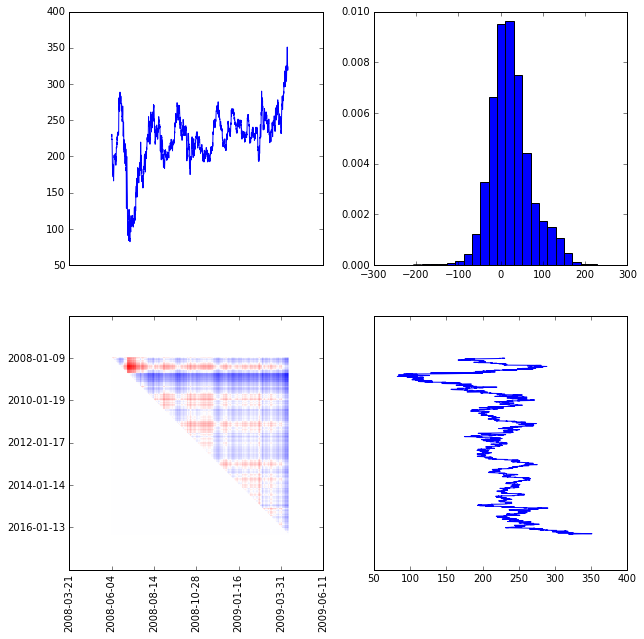

In [107]:
def tics_formatter(x):
    x = int(x)
    if (x>=0)and(x<len(dates)):
        d = dates[x] 
        return '{}-{:02d}-{:02d}'.format(d // 10000, d // 100 % 100, d % 100)
    else:
        return ''

fig = plt.figure(figsize=(8, 8));
ax_dotmatrix = fig.add_subplot(223);
ax_dotmatrix.imshow(dA,norm=MidpointNormalize(midpoint=0.),cmap=plt.cm.bwr_r);
#fig.colorbar();

ax_dyn_x = fig.add_subplot(221, sharex=ax_dotmatrix);
ax_dyn_y = fig.add_subplot(224, sharey=ax_dotmatrix);

ax_dyn_x.get_xaxis().set_visible(False)
ax_dyn_y.get_yaxis().set_visible(False)

ax_dyn_x.plot(values);
ax_dyn_y.plot(values,range(len(dates)));
date_xlabels = map(tics_formatter,plt.xticks()[0])
date_ylabels = map(tics_formatter,plt.yticks()[0])
ax_dotmatrix.set_xticklabels(date_xlabels,rotation='vertical');
ax_dotmatrix.set_yticklabels(date_ylabels)

ax_hist = fig.add_subplot(222);
ax_hist.hist(deltas,bins=24,normed=True);
ax_hist.set_xlim(auto=True);
ax_hist.set_ylim(auto=True);



In [17]:
np.mean(deltas),np.median(deltas)

(23.989851867277661, 18.819999999999993)